# Deep Learning - Project 2
**Nina Żukowska 148278**
**Antoni Solarski 148270**

In [1]:
import time

from sklearn.model_selection import train_test_split

from utils import *

# PART 2

---
#### 11) Training with different batch sizes (e.g. 1, 16, 32, number_of_samples)

In [2]:
random.seed(23)

# download and preprocess data
download_data_if_not_exists()
N_CLASSES = 15
CLASSES, MIN_SAMPLE = choose_biggest_classes(DATA_DIR, N_CLASSES)
IMAGES, LABELS = load_data(DATA_DIR, CLASSES, MIN_SAMPLE)
X, MEAN, STD = standardize_images(resize_images(IMAGES))
y, labels_enc, labels_ohe = one_hot_encoding_for_labels(LABELS)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((913, 200, 300, 3), (392, 200, 300, 3), (913, 15), (392, 15))

In [3]:
# train and evaluate model
def batch_size_experiment(batch_size):
    model = get_model(N_CLASSES)
    start_time = time.time()
    history = train_model(model, X_train, y_train, X_test, y_test, 2, batch_size) # TODO: increase epochs for learning
    end_time = time.time()
    _, accuracy = model.evaluate(X_test, y_test)
    return model, history, accuracy, end_time - start_time

In [4]:
# train for each batch size
BATCH_SIZES = (1, 16, 32, len(X_train))
results = {bs: batch_size_experiment(bs) for bs in BATCH_SIZES}

Epoch 1/2
913/913 [==============================] - 165s 179ms/step - loss: 2.7354 - accuracy: 0.0515 - val_loss: 2.7080 - val_accuracy: 0.0663
Epoch 2/2
13/13 [==============================] - 3s 204ms/step - loss: 2.7085 - accuracy: 0.0663
Epoch 1/2
58/58 [==============================] - 48s 806ms/step - loss: 2.7828 - accuracy: 0.0712 - val_loss: 2.7008 - val_accuracy: 0.1276
Epoch 2/2
13/13 [==============================] - 3s 224ms/step - loss: 2.6024 - accuracy: 0.1556
Epoch 1/2
29/29 [==============================] - 43s 1s/step - loss: 2.8633 - accuracy: 0.0734 - val_loss: 2.7014 - val_accuracy: 0.0995
Epoch 2/2
13/13 [==============================] - 3s 242ms/step - loss: 2.6818 - accuracy: 0.1173
Epoch 1/2
1/1 [==============================] - 47s 47s/step - loss: 2.7329 - accuracy: 0.0668 - val_loss: 2.9987 - val_accuracy: 0.0816
Epoch 2/2
13/13 [==============================] - 3s 228ms/step - loss: 2.7090 - accuracy: 0.0765


Training with batch sizes 1 took 323.9759407043457.
Obtained accuracy: 0.06632652878761292


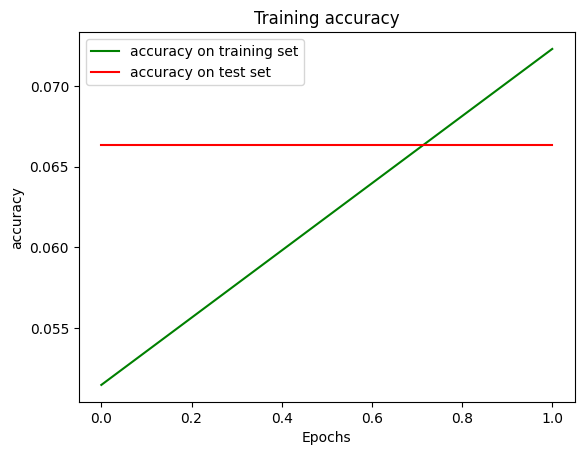

Training with batch sizes 16 took 94.31187462806702.
Obtained accuracy: 0.15561224520206451


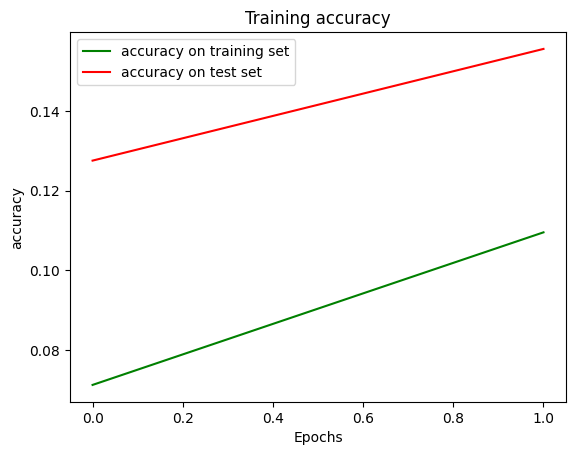

Training with batch sizes 32 took 84.39254593849182.
Obtained accuracy: 0.11734694242477417


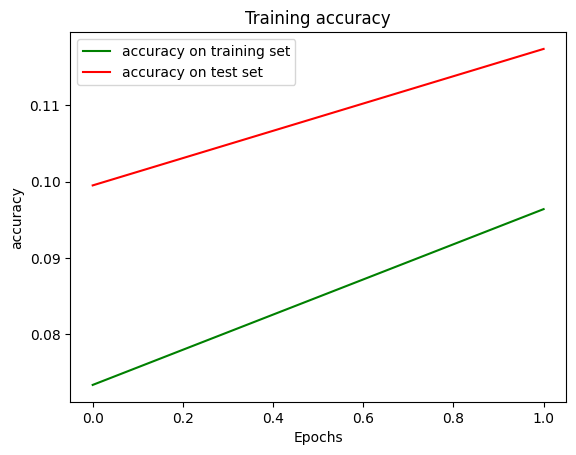

Training with batch sizes 913 took 89.35253691673279.
Obtained accuracy: 0.07653061300516129


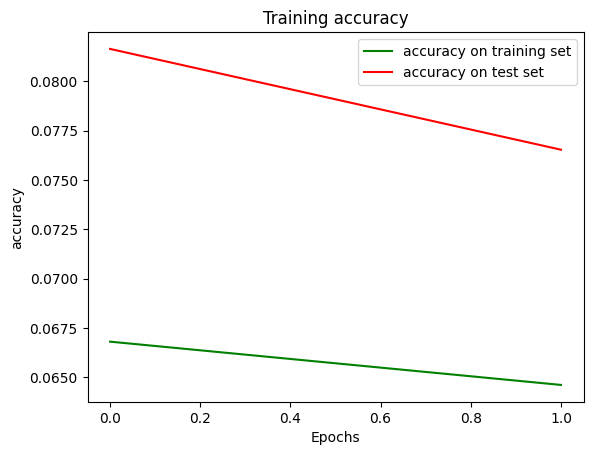

In [5]:
# print model evaluation metrics and training metrics
for batch_size, (m, h, acc, t) in results.items():
    print(f'Training with batch sizes {batch_size} took {t}.')
    print(f'Obtained accuracy: {acc}')
    plot_metrics_from_model_history(h, 'accuracy')

##### Results discussion